In [ ]:
from glob import glob
from pathlib import Path
from tqdm.auto import tqdm
import os 
videos = [e for e in glob('*') if Path(e).is_dir()]
for v in videos:
    imgs = glob(f'{v}/*.jpg')
    for src in tqdm(imgs):
        dst = src.replace('/', f'/mobile_{Path(v).name}_')
        os.rename(src, dst)

In [101]:
import shutil
videos = [e for e in glob('2020*') if Path(e).is_dir()]
dst = 'my_mobile_1fps'
shutil.rmtree(dst, ignore_errors=True)
Path(dst).mkdir()
for v in videos:
    imgs = glob(f'{v}/*.jpg')[::15]
    for img in imgs:
        shutil.copy(img, dst)

In [7]:
imgs[:2]

['20201129_172148/mobile_20201129_172148_000.jpg',
 '20201129_172148/mobile_20201129_172148_005.jpg']

In [ ]:
import random, json
from PIL import Image
import numpy as np
import cv2
annos = glob('my_mobile_1fps/*.json')
for json_path in tqdm(annos):
    with open(json_path) as f:
        anno = json.load(f)
    objs = anno['shapes']
    
    rx, ry = 940/768, 520/432, 
    rs = np.array([rx, ry])
    for e in objs:
        if e['shape_type'] == 'rectangle':
            pts = np.array(e['points'])
            xs = pts[:,0]
            ys = pts[:,1]
            x1, x2 = min(xs), max(xs)
            y1, y2 = min(ys), max(ys)
            e['shape_type'] = 'polygon'
            e['points'] = [[x1, y1], [x2, y1], [x2, y2], [x1, y2]]
            
        pts = np.array(e['points'])
        x, y = pts[0]
        if x < 960 and y < 540:
            print()
            e['points'] = (pts*rs).tolist() 
        if x < 960 and 540 < y:
            e['points'] = (((pts - np.array([0, 1080-432]))*rs) + np.array([0,1080-520])).tolist()
        if 960 < x and y < 540:
            e['points'] = (((pts - np.array([1920-768, 0]))*rs) + np.array([1920-940, 0])).tolist()
        if 960 < x and 540 < y:
            e['points'] = (((pts - np.array([1920-768, 1080-432]))*rs) + np.array([1920-940, 1080-520])).tolist()
    with open(json_path, 'w') as f:
        json.dump(anno, f)
    


In [100]:
annos[0]
!ls -l /mnt/d/gc2020/my_mobile/merged_520/merged_image/my_mobile_1fps/mobile_20201125_221341_030.jpg

-rwxrwxrwx 1 kts123 kts123 484 Dec  7 18:26 /mnt/d/gc2020/my_mobile/merged_520/merged_image/my_mobile_1fps/mobile_20201125_221341_030.jpg


[1.22395833 1.2037037 ]
[[1230.6666666666667, 903.2380952380952], [1276.0, 891.047619047619], [1307.4285714285713, 891.8095238095239], [1346.857142857143, 907.6190476190476], [1355.2380952380952, 918.2857142857143], [1364.3809523809523, 950.8571428571429], [1364.1904761904761, 964.1904761904761], [1329.904761904762, 964.3809523809524], [1235.2380952380952, 934.2857142857143], [1229.5238095238096, 924.0]]
[[353.91715976331363, 381.27810650887574], [388.23668639053255, 386.01183431952666], [405.396449704142, 401.396449704142], [409.53846153846155, 423.8816568047337], [407.76331360946745, 433.3491124260355], [359.8343195266272, 431.57396449704146], [350.9585798816568, 397.2544378698225]]

[[397.5903614457831, 857.6592082616178], [406.5404475043029, 858.0034423407917], [416.5232358003442, 876.4199655765921], [418.5886402753872, 880.3786574870911], [415.8347676419965, 910.8433734939758], [406.19621342512903, 916.1790017211703], [392.94320137693626, 912.0481927710842], [389.15662650602405, 9

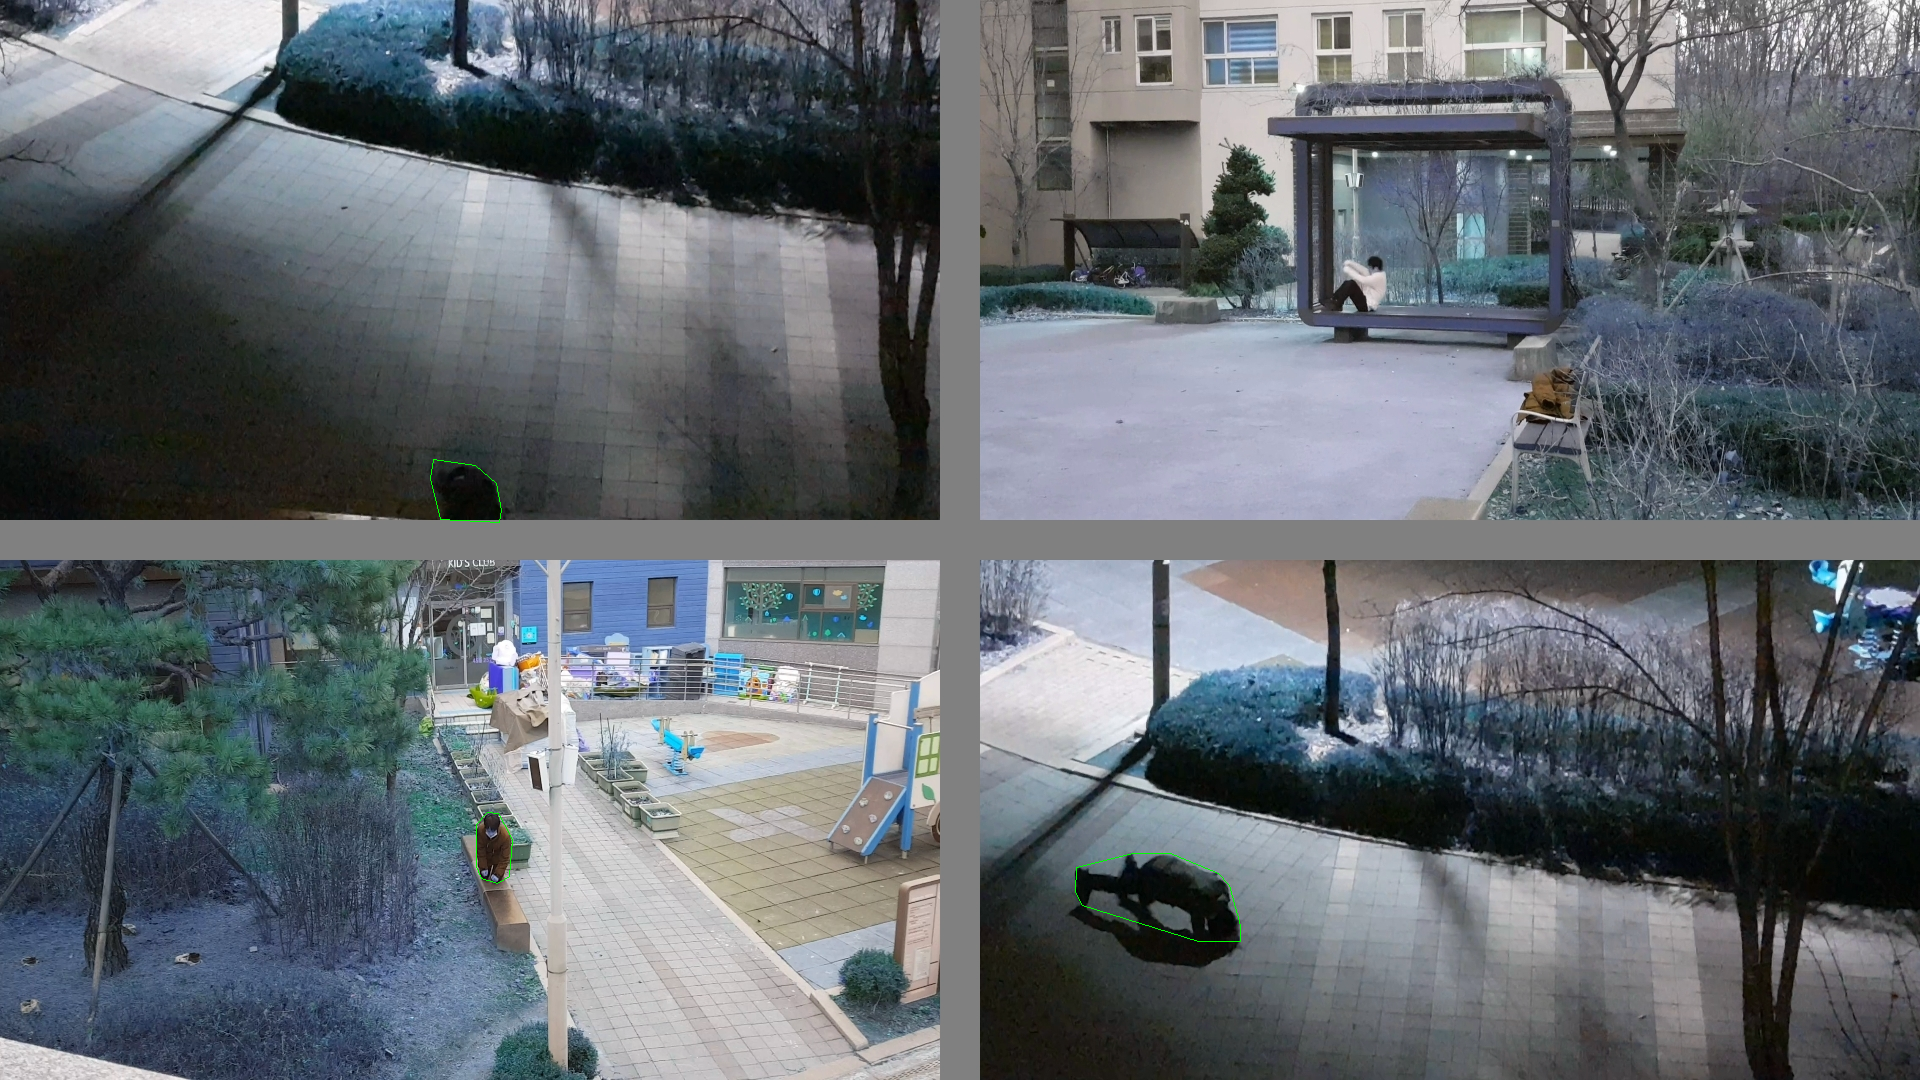

In [92]:
cv2.polylines(im, [(np.array(e['points'])).round().astype(np.int32)], True, (0,255,0))
display(Image.fromarray(im))